In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

IMAGE_DIR = "../image"
os.makedirs(IMAGE_DIR, exist_ok=True)


In [2]:
df = pd.read_csv("../data/processed/churn_cleaned.csv")
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,False,...,False,False,False,False,False,False,False,False,True,False


In [3]:
df.shape


(7043, 31)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.000,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.000,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.000,1.00,1.00
PaperlessBilling,7043.0,0.592219,0.491457,0.00,0.000,1.000,1.00,1.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.000,1.00,1.00


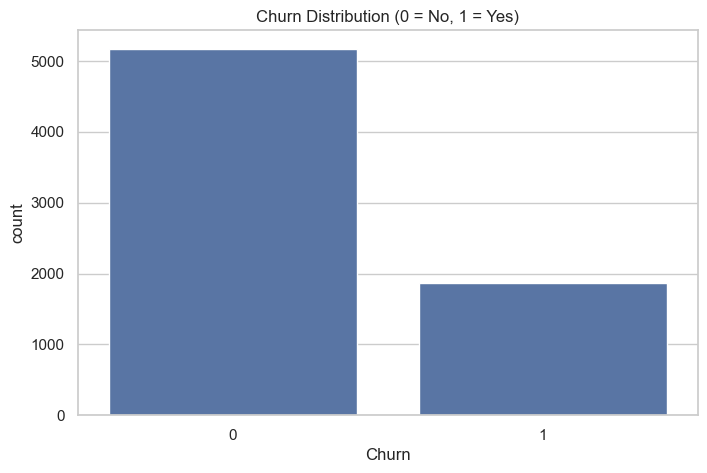

In [6]:
plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution (0 = No, 1 = Yes)")
plt.savefig(f"{IMAGE_DIR}/churn_distribution.png", bbox_inches="tight")
plt.show()


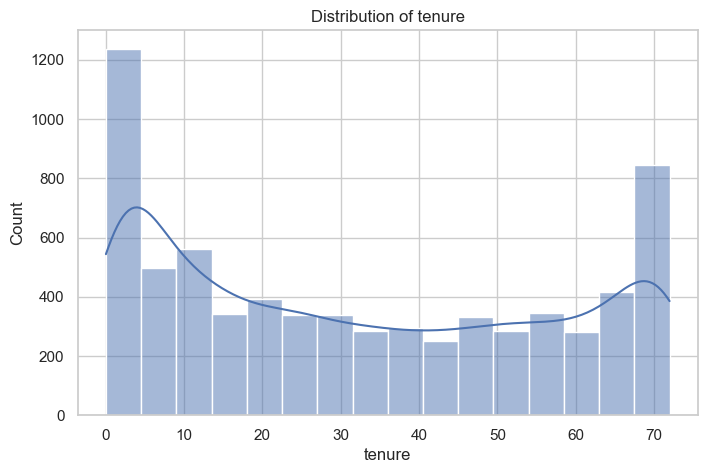

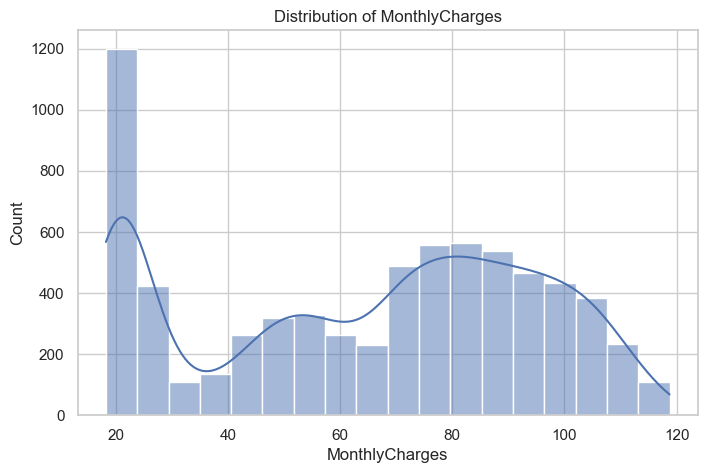

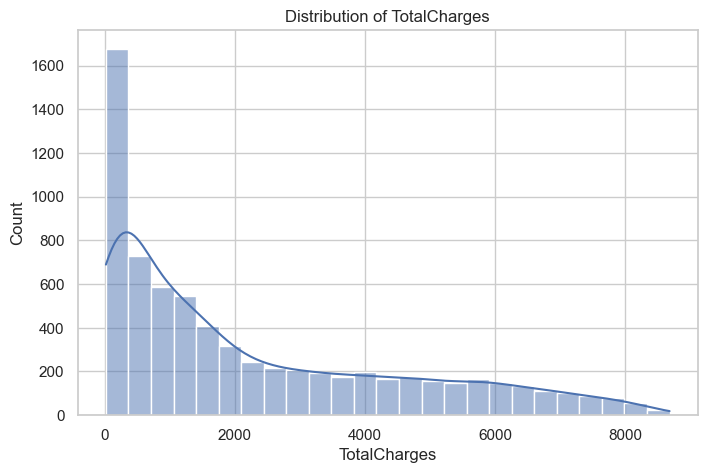

In [7]:
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in num_features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(f"{IMAGE_DIR}/{col}_distribution.png", bbox_inches="tight")
    plt.show()


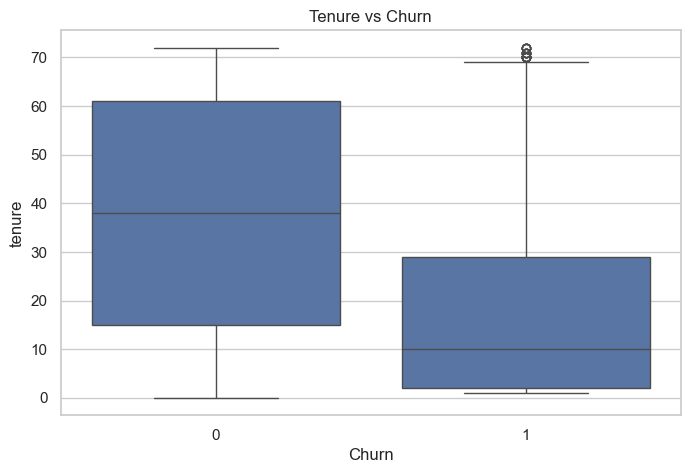

In [8]:
plt.figure()
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.savefig(f"{IMAGE_DIR}/tenure_vs_churn.png", bbox_inches="tight")
plt.show()


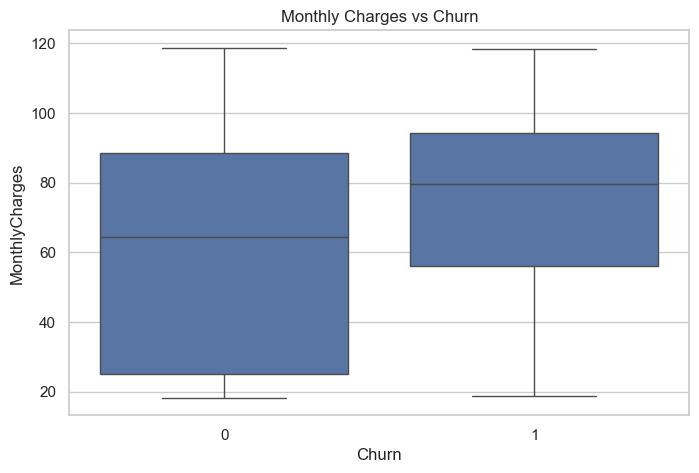

In [9]:
plt.figure()
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.savefig(f"{IMAGE_DIR}/monthlycharges_vs_churn.png", bbox_inches="tight")
plt.show()


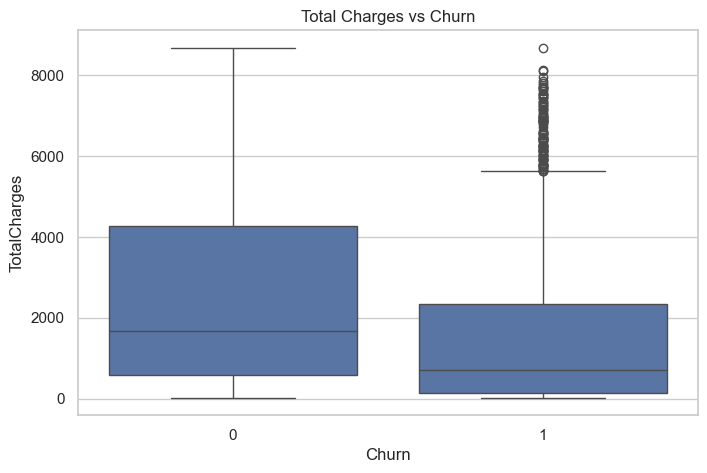

In [10]:
plt.figure()
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.savefig(f"{IMAGE_DIR}/totalcharges_vs_churn.png", bbox_inches="tight")
plt.show()


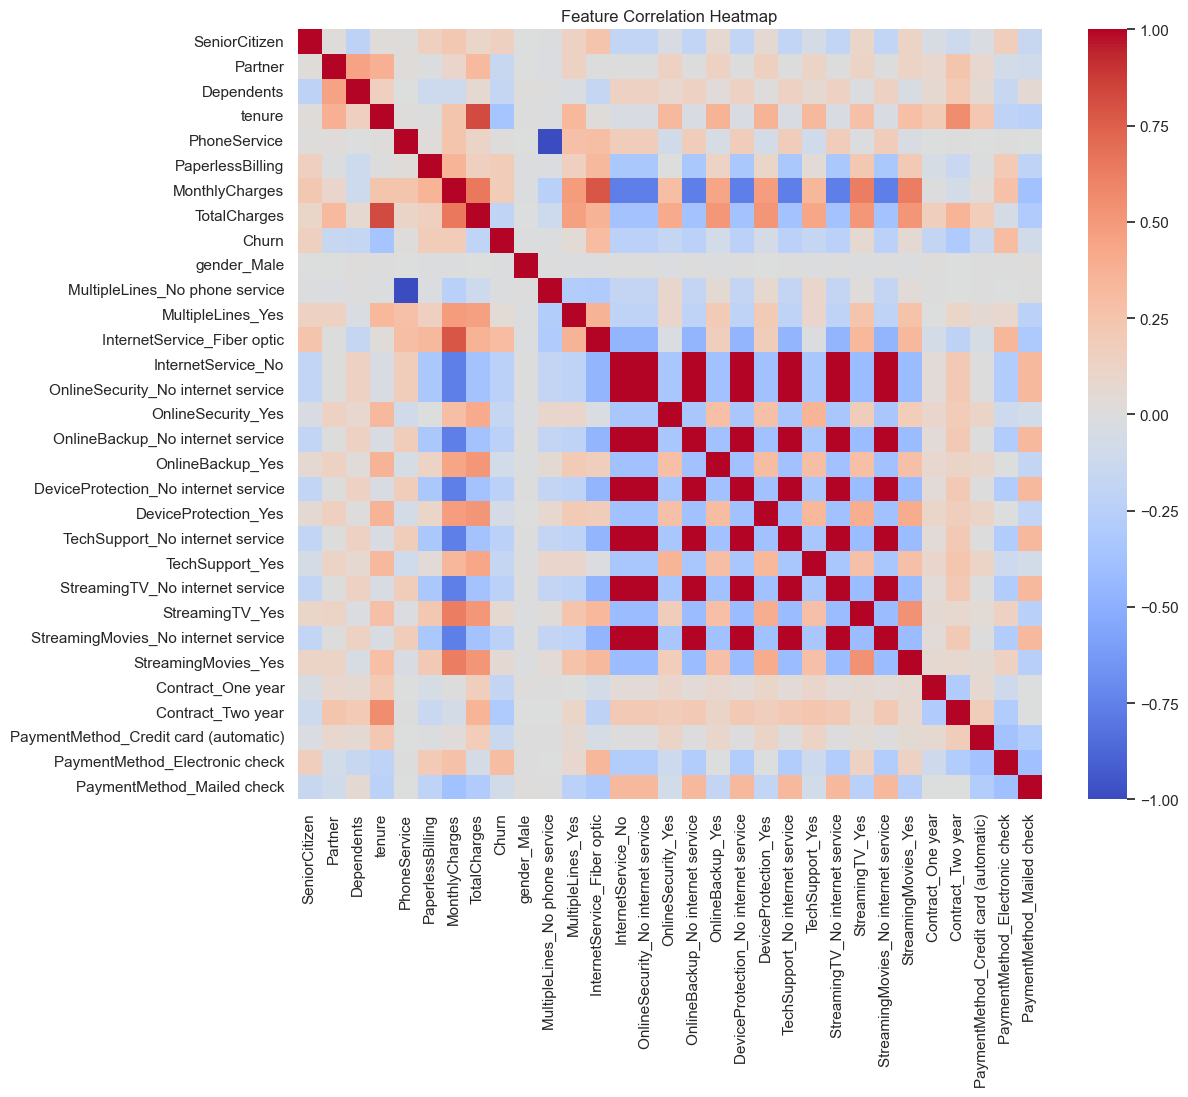

In [11]:
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.savefig(f"{IMAGE_DIR}/correlation_heatmap.png", bbox_inches="tight")
plt.show()


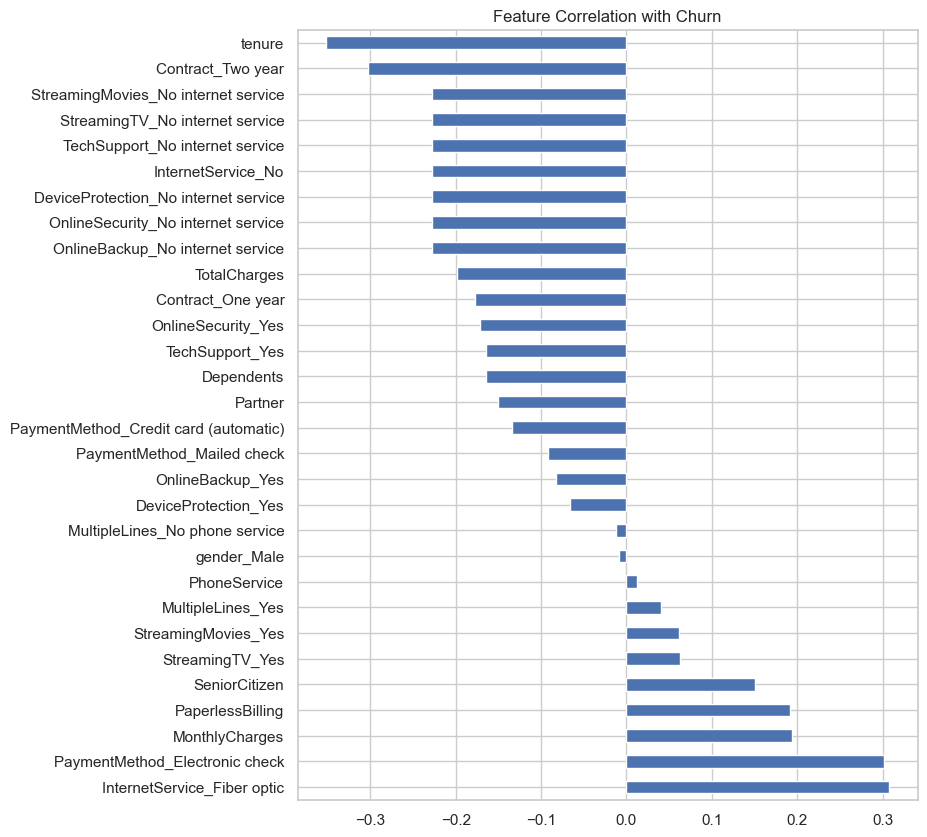

In [12]:
churn_corr = corr["Churn"].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
churn_corr.drop("Churn").plot(kind="barh")
plt.title("Feature Correlation with Churn")
plt.savefig(f"{IMAGE_DIR}/feature_correlation_with_churn.png", bbox_inches="tight")
plt.show()


In [13]:
df.groupby("Churn").agg(
    avg_tenure=("tenure", "mean"),
    avg_monthly_charge=("MonthlyCharges", "mean"),
    avg_total_charge=("TotalCharges", "mean"),
    customer_count=("Churn", "count")
)


,avg_tenure,avg_monthly_charge,avg_total_charge,customer_count
Churn,,,,
0,37.569965,61.265124,2552.882494,5174
1,17.979133,74.441332,1531.796094,1869


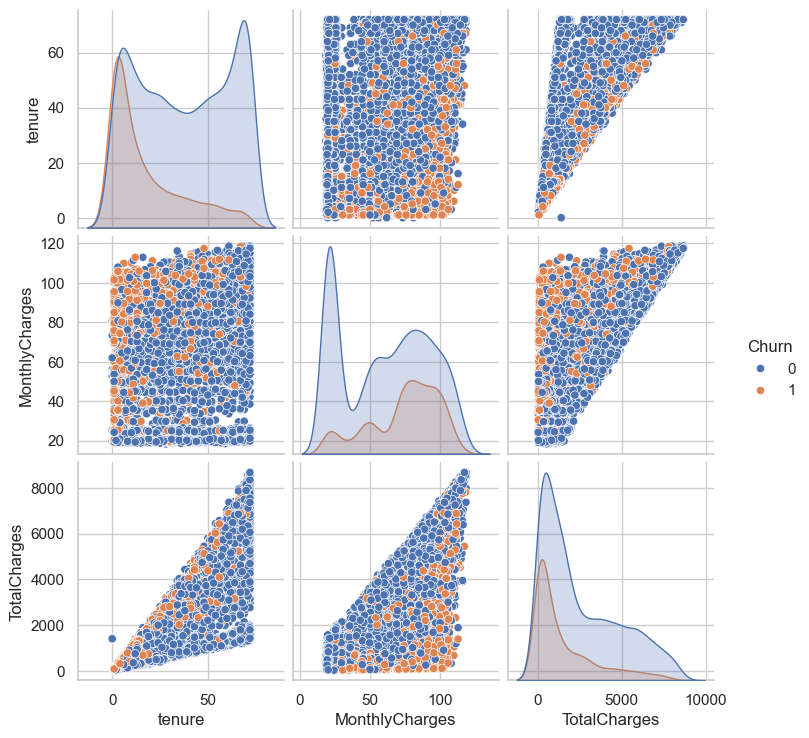

In [14]:
pairplot_fig = sns.pairplot(
    df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]],
    hue="Churn"
)

pairplot_fig.savefig(f"{IMAGE_DIR}/pairplot.png")
plt.show()


In [15]:
df.to_csv("../data/processed/churn_final_eda.csv", index=False)
